In [1]:
import pandas as pd
df = pd.read_csv('weight-height.csv')

In [2]:
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


Encoding object column

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
df.Gender = le.fit_transform(df.Gender)

In [6]:
df.head()

Gender     Height      Weight
0       1  73.847017  241.893563
1       1  68.781904  162.310473
2       1  74.110105  212.740856
3       1  71.730978  220.042470
4       1  69.881796  206.349801

Dividing data for training and testing

In [7]:
x = df.drop('Weight', axis = 1)

In [8]:
y = df.Weight

In [9]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, train_size = .70, random_state = 42)

Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [12]:
result1 = lr.predict(xtest)
result1

array([142.44868114, 186.0517281 , 198.42283706, ..., 102.94080643,
       190.83713617, 143.34786753])

In [13]:
score1 = lr.score(xtest,ytest)
score1

0.905911242442266

In [14]:
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(ytest, result1)
mae1

7.870097130738319

In [15]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(ytest, result1)
mse1

96.83734437830608

# K-NN Algorithm

K-NN Regression without tuning

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [17]:
knr.fit(xtrain, ytrain)

KNeighborsRegressor()

In [18]:
result2 = knr.predict(xtest)
result2

array([142.1445657 , 181.38276924, 187.07075266, ..., 101.79654426,
       192.43702356, 145.3632227 ])

In [19]:
score2 = knr.score(xtest, ytest)
score2

0.8821086423439015

In [20]:
mse2 = mean_squared_error(ytest, result2)
mse2

121.33528273624482

K-NN Regression after tuning

In [21]:
import numpy as np

In [22]:
n_neighbors = np.random.randint(5, 15, 2)
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = np.random.randint(15, 50, 5)
p = [1, 2]

In [23]:
ids = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'algorithm' : algorithm,
    'leaf_size' : leaf_size,
    'p' : p
}

In [24]:
from sklearn.model_selection import RandomizedSearchCV
rcv = RandomizedSearchCV(knr, ids, n_iter = 50, cv = 3)

In [25]:
rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=50,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([28, 39, 45, 28, 34]),
                                        'n_neighbors': array([9, 6]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [26]:
rcv.cv_results_

{'mean_fit_time': array([0.00133348, 0.00266727, 0.00233372, 0.0030009 , 0.00300113,
        0.00200065, 0.00233372, 0.00233444, 0.00133348, 0.00200041,
        0.00133371, 0.00200049, 0.00200081, 0.00100025, 0.00266719,
        0.00266727, 0.00233412, 0.00233412, 0.00133355, 0.00266703,
        0.00166694, 0.00266727, 0.00133348, 0.0023338 , 0.00233404,
        0.00266703, 0.00200073, 0.00200049, 0.00233396, 0.00266743,
        0.00266727, 0.00200017, 0.00166694, 0.00333436, 0.00366751,
        0.00300042, 0.00266735, 0.00200025, 0.00266711, 0.00233396,
        0.00200057, 0.00266719, 0.00266735, 0.00300097, 0.00166734,
        0.00233404, 0.00200025, 0.0016671 , 0.00166702, 0.00200049]),
 'std_fit_time': array([4.71876206e-04, 4.71426560e-04, 4.71482745e-04, 1.12391596e-07,
        8.99132768e-07, 1.12391596e-07, 4.71482745e-04, 4.71145611e-04,
        4.71370394e-04, 1.12391596e-07, 4.71370394e-04, 2.24783192e-07,
        1.94667955e-07, 2.97360213e-07, 4.71707529e-04, 4.71257962e-0

In [27]:
data = pd.DataFrame(rcv.cv_results_)
data

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.001333  4.718762e-04         0.119027    7.119993e-03   
1        0.002667  4.714266e-04         0.005335    4.714266e-04   
2        0.002334  4.714827e-04         0.014337    4.714827e-04   
3        0.003001  1.123916e-07         0.005335    4.714266e-04   
4        0.003001  8.991328e-07         0.005001    8.920806e-07   
5        0.002001  1.123916e-07         0.017671    4.717075e-04   
6        0.002334  4.714827e-04         0.013336    4.714266e-04   
7        0.002334  4.711456e-04         0.004334    4.713142e-04   
8        0.001333  4.713704e-04         0.119693    4.643892e-03   
9        0.002000  1.123916e-07         0.091687    5.186423e-03   
10       0.001334  4.713704e-04         0.088020    2.160753e-03   
11       0.002000  2.247832e-07         0.017004    1.123916e-07   
12       0.002001  1.946680e-07         0.087353    2.625367e-03   
13       0.001000  2.973602e-07         0.121360    1.181595e-02   
14       0.002667  4.717075e-04         0.005001    2.973602e-07   
15       0.002667  4.712580e-04         0.005169    2.374838e-04   
16       0.002334  4.715390e-04         0.020004    2.160679e-03   
17       0.002334  4.715390e-04         0.004668    4.717637e-04   
18       0.001334  4.713142e-04         0.087353    2.625216e-03   
19       0.002667  4.717637e-04         0.004668    4.713704e-04   
20       0.001667  4.716514e-04         0.120694    5.437594e-03   
21       0.002667  9.431903e-04         0.004668    4.717076e-04   
22       0.001333  4.713704e-04         0.089687    9.428531e-04   
23       0.002334  4.714266e-04         0.013669    4.718761e-04   
24       0.002334  4.719323e-04         0.018004    1.946680e-07   
25       0.002667  4.715951e-04         0.004335    4.714827e-04   
26       0.002001  4.052337e-07         0.006001    1.946680e-07   
27       0.002000  1.123916e-07         0.006001    1.123916e-07   
28       0.002334  4.711456e-04         0.005668    4.713142e-04   
29       0.002667  4.715390e-04         0.016337    4.715390e-04   
30       0.002667  4.715952e-04         0.006002    5.150430e-07   
31       0.002000  5.619580e-07         0.119026    4.967555e-03   
32       0.001667  4.714827e-04         0.123028    5.716494e-03   
33       0.003334  4.718199e-04         0.007335    4.711456e-04   
34       0.003668  4.718200e-04         0.008002    5.947204e-07   
35       0.003000  8.166321e-04         0.013003    1.633264e-03   
36       0.002667  4.718200e-04         0.004667    4.716513e-04   
37       0.002000  1.123916e-07         0.005001    1.123916e-07   
38       0.002667  4.716513e-04         0.015670    4.714827e-04   
39       0.002334  4.714828e-04         0.004668    4.714266e-04   
40       0.002001  1.946680e-07         0.089356    2.622916e-03   
41       0.002667  4.715390e-04         0.005668    4.716513e-04   
42       0.002667  4.714829e-04         0.015670    4.715952e-04   
43       0.003001  1.946680e-07         0.004001    1.946680e-07   
44       0.001667  4.715953e-04         0.088686    2.055326e-03   
45       0.002334  4.717637e-04         0.005668    4.715390e-04   
46       0.002000  8.164374e-04         0.122028    2.160495e-03   
47       0.001667  4.715951e-04         0.091354    3.859733e-03   
48       0.001667  4.715390e-04         0.122027    7.790490e-03   
49       0.002000  1.123916e-07         0.116359    3.400035e-03   

   param_weights param_p param_n_neighbors param_leaf_size param_algorithm  \
0        uniform       2                 9              34           brute   
1        uniform       1                 6              34         kd_tree   
2        uniform       2                 9              28       ball_tree   
3        uniform       1                 9              45         kd_tree   
4        uniform       2                 9              45            auto   
5        uniform       2                 9              39       ba

In [28]:
rcv.best_score_

0.8854926028700844

In [29]:
rcv.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 9,
 'leaf_size': 45,
 'algorithm': 'kd_tree'}

In [30]:
knr2 = KNeighborsRegressor(weights = 'uniform', p = 1, n_neighbors = 11, leaf_size = 32, algorithm = 'auto')
knr2

KNeighborsRegressor(leaf_size=32, n_neighbors=11, p=1)

In [31]:
knr2.fit(xtrain, ytrain)

KNeighborsRegressor(leaf_size=32, n_neighbors=11, p=1)

In [32]:
score3 = knr2.score(xtest, ytest)
score3

0.8963802669369483

In [33]:
#Difference between tuned KNR and default KNR
score3 - score2

0.014271624593046761

In [34]:
result3 = knr2.predict(xtest)
result3

array([143.5637173 , 182.95499289, 193.79191615, ..., 102.08569933,
       192.48230766, 144.07225415])

In [35]:
mse3 = mean_squared_error(ytest, result3)
mse3

106.64674542925856

In [36]:
#LR, Default KNR, Tuned KNR
scores = {score1, score2, score3}
mse = {mse1, mse2, mse3}
scores

{0.8821086423439015, 0.8963802669369483, 0.905911242442266}

In [37]:
mse

{96.83734437830608, 106.64674542925856, 121.33528273624482}

K-NN Classification

In [38]:
df1 = df.copy()

In [39]:
df1.head()

Gender     Height      Weight
0       1  73.847017  241.893563
1       1  68.781904  162.310473
2       1  74.110105  212.740856
3       1  71.730978  220.042470
4       1  69.881796  206.349801

In [40]:
x = df1.drop('Gender', axis = 1)
y = df1.Gender

In [41]:
xtrain, xtest, ytrain, ytest = tts(x, y, train_size = .70, random_state = 42)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [43]:
knc.fit(xtrain, ytrain)

KNeighborsClassifier()

In [44]:
knc.score(xtest, ytest)

0.9131281651733542

In [45]:
pred = knc.predict(xtest)
pred

array([0, 1, 1, ..., 0, 1, 0])

In [46]:
#Showing confusion matrix, roc curve and classification report
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report

In [47]:
con_mat = confusion_matrix(ytest, pred)
con_mat

array([[ 945,  121],
       [ 102, 1399]], dtype=int64)

<AxesSubplot:>

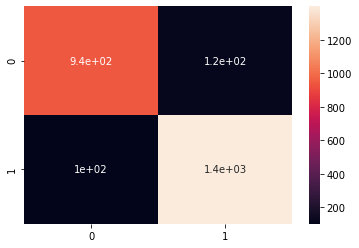

In [48]:
import seaborn as sns
sns.heatmap(con_mat, annot = True)

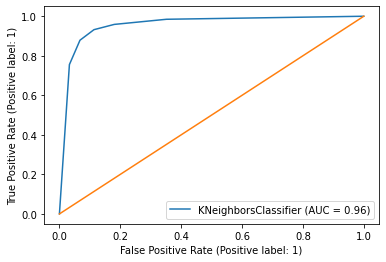

In [49]:
plot_roc_curve(knc, xtest, ytest)
import matplotlib.pyplot as plt
plt.plot([0,1], [0,1])

In [50]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1066
           1       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567

